# t-Tests and Two Sample Tests

> In this lab, we will take a close look at t-tests and two samples tests, in order to get an idea for how they can be applied to real data.

> What is a t-test, and when do we use it? A t-test is used to compare the means of one or two samples, when the underlying population parameters of those samples (mean and standard deviation) are unknown. Like a z-test, the t-test assumes that the sample follows a normal distribution. In particular, this test is useful for when we have a small sample size, as we can not use the Central Limit Theorem to use a z-test.
>
> There are two kinds of t-tests:
> 1. One Sample t-tests
> 2. Two Sample t-tests
>
> We will go through both in this exercise. 
> 
> Before we test anything, we will need some data. In particular, some normal data. Let $\mu_{True}=10$ and $\sigma_{True}=3$ for the underlying normal population, then use the `rnorm()` function with your selected parameters to generate 20 samples from that particular normal distribution. Your final code will look something like `rnorm(20, mean=10, sd=3)`. If you want your code to be reproducable, make sure to set a seed as well using `set.seed()`.

In [9]:
set.seed(5)
values = rnorm(20, mean = 10, sd = 3)

> Now imagine that you where just given this data, without knowing the underlying parameters. How would you go about estimating the true mean of the population from the sample? We would need to do some hypothesis testing.
>
> Let's start with a "reasonable" hypothesis that $\mu = 10$ (we know this is true, but suppose you don't for the sake of the test) and an alternate hypothesis that $\mu \ne 10$. To test this, we need to think about certian attributes of our sample:
> 1. Is the sample size "large" (n>30)? No, the sample size is n=20.
> 2. Do we know any of the underlying parameters? No, the true mean and standard deviation are unknown.
> 3. Is the sample approximately normally distributed? Hmm, let's check. Use the `hist()` function to plot your samples and check if they follow an approximately normal distribution.

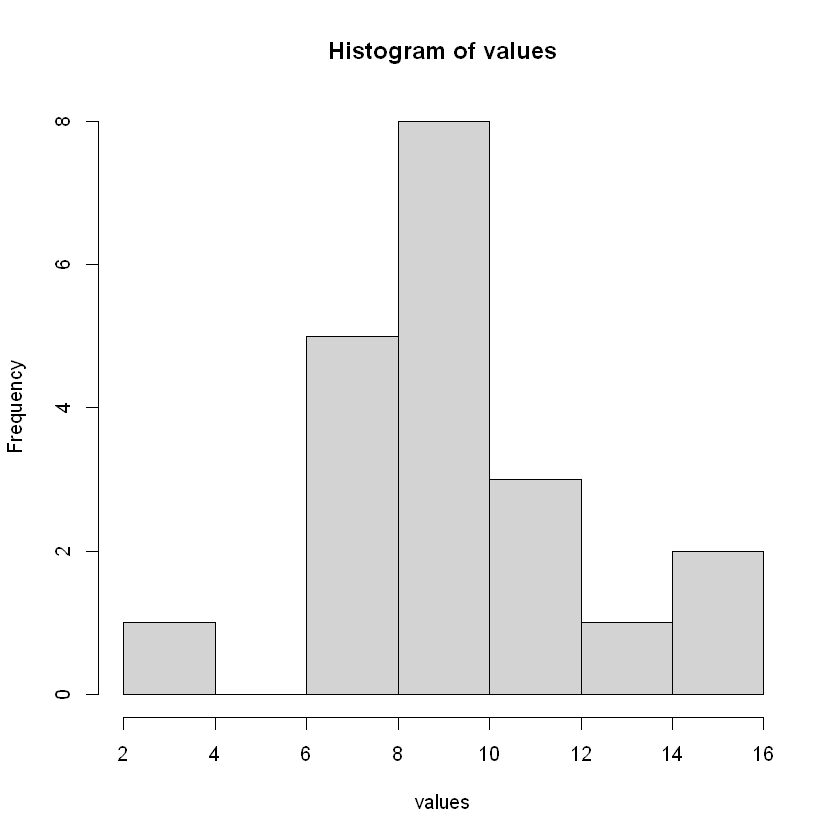

In [10]:
hist(values)

> From there, we can see that we should use a t-test. To calculate a t-statistic from our data, it's just plugging values into the formula:
>
> $$ \text{t-stat} = \frac{\bar{x}-\mu_0}{s/\sqrt{n}} $$
>
> where $\bar{x}$ is the sample mean, $\mu_0$ is the true mean when assuming that the null is correct, $s$ is the sample standard deviation, and $n$ is the sample size. Then our t-statistic will follow a Student's t-distribution, which we can use to determine the probability of observing our data, given the null hypothesis. Use the `mean()` and `sd()` functions on your samples to solve for these values, and then calculate the t-statistic for your data.

In [11]:
#H_0: U = 10
#H1: U != 10

x_bar = mean(values)
u_0 = 10
n = length(values)
s = sd(values)

t_stat = (x_bar - u_0)/(s/sqrt(n))
paste0('T-statistic is: ', round(t_stat,3))

[1] "T-statistic is: -1.35"

> We have a test statistic, now we want to determine how likely it was that we observed our test statistic. We can calculate this with a p-value, just as we did with a z-test. However, there is an extra step with a t-test. 
> 
> The Student's t-distribution has a "Degrees of Freedom" parameter (typically annotated as $\nu$) which affects the spread of data values of the underlying distribution. The higher the degree of freedom, the less spread that will be observed. This parameter is based on the number of samples observed. 
> 
> Before we apply this to our sample, let's take a quick theoretical detour to see how different degrees of freedom affect the different shapes. Execute the cell below to plot the PDFs for different t-distributions, where the only difference is the degrees of freedom.

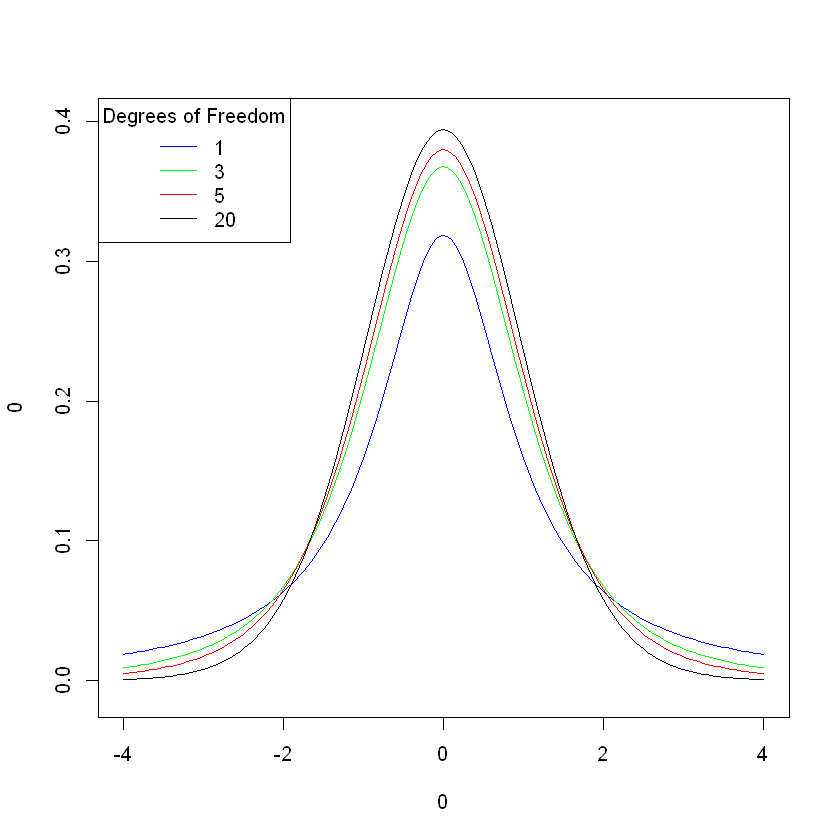

In [12]:
x = seq(-4, 4, 0.05)

y.1 = dt(x, 1)
y.3 = dt(x, 3)
y.5 = dt(x, 5)
y.20 = dt(x, 20)

plot(0,0,xlim = c(-4,4),ylim = c(-0.01, 0.4),type = "n")
lines(x, y.1, col="blue")
lines(x, y.3, col="green")
lines(x, y.5, col="red")
lines(x, y.20, col="black")
legend("topleft", legend=c(1,3,5,20), col=c("blue", "green", "red", "black"), lty=c(1,1), title="Degrees of Freedom")

> For a one sample t-test, the degrees of freedom is calculated as $\nu = n-1$. So, for our data, we get $\nu = 20 - 1 = 19$ degrees of freedom.
>
> One of the ways to check the . Since we're using a two-tailed test (because our alternative hypothesis is $\mu_0 \ne 10$), we need to calculate the probability that the true mean is significantly above or below the observed data. We can solve this using the equation: $\text{p-value}= 2 F_t(-|t|, dof=n-1)$. Note that $F_t$ is the CDF of the t-distribution, which we can calculate in R using the `pt()` function, and that $t$ is the test statistic we calculated earlier.
>
> Putting those all together, we can calculate the p-value using similar to `2*pt(-abs(test.stat), df=n-1)`.

In [13]:
pvalue = 2*pt(-abs(t_stat), df=n-1)
paste0('The pvalue is: ', round(pvalue, 3))

[1] "The pvalue is: 0.193"

> Our null hypothesis was that $\mu=10$. Based on your results, and at a significance level of $\alpha=0.1$, does your data support or reject that null hypothesis?
>
> Using the same data, try testing some "unreasonable" guess at the true mean, such as $\mu=100$. Does the test correctly reject the mean?

> **Answer:** Based on the results from our t-test:
> - T-statistic: -1.35
> - P-value: 0.193
> - Significance level: α = 0.1
>
> Since the p-value (0.193) is **greater than** the significance level α (0.1), we **fail to reject** the null hypothesis. 
>
> **Conclusion:** At the α = 0.1 significance level, our data supports the null hypothesis that μ = 10. There is insufficient evidence to conclude that the true population mean is different from 10.
>
> This makes sense because we know the true population mean actually is 10 (since we generated the data with that parameter), so our test correctly fails to reject the true null hypothesis.

In [14]:
#H_0: U = 100
#H1: U != 100

x_bar = mean(values)
u_0 = 100
n = length(values)
s = sd(values)

t_stat = (x_bar - u_0)/(s/sqrt(n))
paste0('T-statistic is: ', round(t_stat,3))

pvalue = 2*pt(-abs(t_stat), df=n-1)
paste0('The pvalue is: ', pvalue)

[1] "T-statistic is: -145.705"

[1] "The pvalue is: 1.97462794523523e-30"

> The other use for t-tests are when you want to compare the mean of two different samples. This is a Two Sample t-Test.
>
> Let your original sample be Sample A. Create a second sample (Sample B) that specifically has the *same* mean $\mu_B=10$ but a *different* standard deviation. Have 15 observations in Sample B.

In [15]:
set.seed(5)
SampleA = values
SampleB = rnorm(15, mean = 10, sd = 5)

> Let's test whether the two samples have the same underlying mean. In particular, we have the null hypothesis that $\mu_A - \mu_B = 0$ and the alternative hypothesis that $\mu_A - \mu_B \ne 0$.
>
> To test this, we can calculate a test statistic that will follow the t-distribution using the equation:
>
> $$\text{t-stat}=\frac{\bar{X}_A - \bar{X}_B}{\sqrt{s_A^2/n_A + s_B^2/n_B}}$$
>
> Another difference from the One Sample test is the degrees of freedom, as it's based on both samples. For the Two Sample Test, we have $\nu = n_A + n_B - 2$.
> 
> Once we have our test statistic and degrees of freedom, we can calculate the p-value in the same was as we did for the One Sample t-test. Use the same functions as you did in the One Sample test to solve for this p-value. What are the results from the test at a significance level of $\alpha=0.1$?

In [17]:
#-- initializing values
xbar_a = mean(SampleA)
xbar_b = mean(SampleB)
var_a = var(SampleA)
var_b = var(SampleB)
n_a = length(SampleA)
n_b = length(SampleB)

#--Computing T-stat
t_stat = (xbar_a - xbar_b)/sqrt(var_a/n_a + var_b/n_b)
paste0('Test statistic is: ', round(t_stat,3))

#-- Calculating Pvalue
pvalue = 2 * (1 - pt(t_stat, df = n_a + n_b -2))
paste0('The pvalue is: ', round(pvalue, 3))

[1] "Test statistic is: 0.036"

[1] "The pvalue is: 0.971"

> **Answer:** Based on the results from our two-sample t-test:
> - **Null hypothesis**: H₀: μₐ - μᵦ = 0 (the two samples have the same mean)
> - **Alternative hypothesis**: H₁: μₐ - μᵦ ≠ 0 (the two samples have different means)
> - **Test statistic**: t = 0.036
> - **P-value**: 0.971
> - **Significance level**: α = 0.1
> - **Degrees of freedom**: nₐ + nᵦ - 2 = 20 + 15 - 2 = 33
>
> **Decision**: Since the p-value (0.971) is **much greater than** the significance level α (0.1), we **fail to reject** the null hypothesis.
>
> **Conclusion**: At the α = 0.1 significance level, there is no significant evidence that the two samples have different means. We conclude that the data supports the hypothesis that μₐ = μᵦ.
>
> **Interpretation**: This result makes perfect sense because both samples were actually generated with the same true mean (μ = 10), even though they had different standard deviations (σₐ = 3, σᵦ = 5). The very high p-value (0.971) and small t-statistic (0.036) indicate that the observed difference between sample means is very likely due to random sampling variation rather than a true difference in population means.